#1)Скачайте текст произведения «Война и мир»: ссылка на [GitHub](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [Google Drive](https://drive.google.com/drive/u/0/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU).

In [361]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [362]:
docs = ['tom_1.txt','tom_2.txt','tom_3.txt','tom_4.txt']

In [363]:
text = ''

In [364]:
# чтение файлов и объединение всех томов в один текст
for i in docs:
  with open(i, 'r') as f:
    text += f.read().lower()

## Очистите его, оставив только русские буквы и символы пробела.

In [365]:
text = re.sub(r"[^а-яА-Я\s]", " ", text)
text = re.sub(r"[\n]", " ", text)
text = re.sub(r"[\s]+", " ", text)

In [366]:
text[:500]

' лев толстой война и мир том том часть первая часть орая часть третья том лев николаевич толстой война и мир том часть первая е поместья мой верный раб ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите ну здравствуйте здравствуй'

## Постройте матрицу переходных вероятностей.

In [367]:
alphabet = "абвгдежзийклмнопрстуфхцчшщъыьэюя "
POS = {l: i for i, l in enumerate(alphabet)}

In [368]:
probabilities = np.zeros((len(alphabet), len(alphabet)))

In [369]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [370]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [371]:
probabilities

array([[7.96207927e-05, 8.60966172e-03, 4.65993959e-02, ...,
        1.08868164e-02, 3.41042395e-02, 2.42912422e-01],
       [6.52445734e-02, 6.00180054e-04, 5.37661298e-03, ...,
        2.75082525e-04, 2.92837851e-02, 1.64299290e-02],
       [1.38932474e-01, 3.38240959e-04, 8.36206816e-04, ...,
        9.39558220e-06, 5.18636137e-03, 1.64901863e-01],
       ...,
       [7.08466171e-05, 7.89231314e-02, 0.00000000e+00, ...,
        6.87212186e-03, 0.00000000e+00, 5.69181722e-01],
       [0.00000000e+00, 1.99474651e-03, 1.53062232e-02, ...,
        6.22123911e-03, 8.70973476e-03, 5.86494974e-01],
       [1.42448616e-02, 4.40427636e-02, 9.11639889e-02, ...,
        2.32168251e-04, 8.44735250e-03, 0.00000000e+00]])

In [372]:
df = pd.DataFrame(probabilities, index=(c for c in alphabet), columns=(c for c in alphabet))

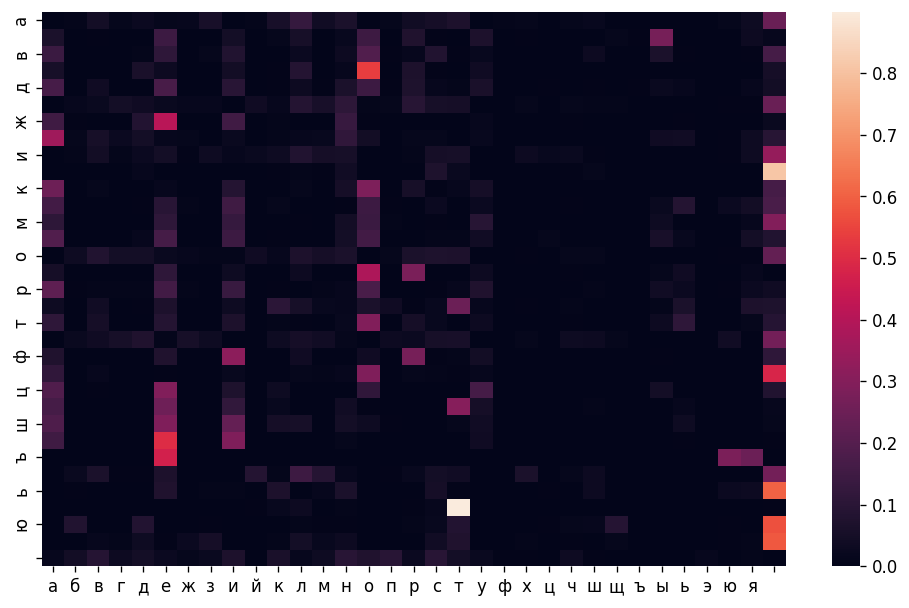

In [373]:
plt.figure(figsize=(10,6), dpi= 120)
sns.heatmap(df)
plt.show()

## Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

In [374]:
start = POS['п']
end = POS['р']
prior = 1. / len(alphabet)
for c in alphabet:
    for c2 in alphabet:
        if c != ' ' and c2 != ' ':
            proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], POS[c2]] * probabilities[POS[c2], end]
            if proba > 0:
                print(''.join(['п', c, c2, 'р']), proba)

паар 5.1954072864925496e-09
пабр 1.0247374565432673e-06
павр 1.1752937483181047e-06
пагр 1.3011064220401548e-06
падр 2.9999574191736857e-06
паер 2.00058282071501e-06
пажр 7.526362941496548e-09
пазр 1.2432687212706234e-06
паир 2.3082625775945094e-08
пайр 2.4533047953529775e-08
пакр 4.942252868120888e-06
памр 1.0231666759428456e-07
панр 1.1369024941770535e-07
паор 7.95214318579869e-09
папр 5.612742574992265e-06
парр 2.3701638149406596e-08
паср 5.136515191383607e-07
патр 5.635504892211659e-06
паур 6.800750379317669e-08
пафр 3.250087526697428e-06
пахр 2.466582314283215e-07
пачр 2.6115014392297708e-08
пашр 5.4177423632989325e-09
пащр 4.68289641627989e-09
паэр 8.764485865175362e-11
паюр 1.6393505991235308e-07
паяр 1.4316159812203055e-07
пгар 2.7436797111869733e-08
пгвр 4.204584654949708e-10
пггр 5.565325745851635e-11
пгдр 5.277474923392563e-08
пгер 3.404482734876333e-08
пгжр 7.57264705850695e-14
пгзр 3.6926625497656344e-12
пгир 4.52740528703026e-09
пгкр 2.946815803989181e-09
пгмр 4.354552469

## Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [375]:
s = []
start = 'б'
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(alphabet), p=probabilities[index])
    if next_char != " ":
        s.append(next_char)

print (''.join(s))

бротетев


# 2) Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM

In [376]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [377]:
from hmmlearn.hmm import GaussianHMM

In [378]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.gridspec import GridSpec
from scipy.stats import boxcox

In [379]:
series = pd.read_csv('weekly-closings-of-the-dowjones-.csv')['Close']

In [380]:
def Dickey_Fuller(y):
  """"Функция принимает на вход временной ряд
  и выводит на печать значения теста Дики-Фуллера 
  """
  result = adfuller(y)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    print()
  if result[1] > 0.05:
    print('Временной ряд не является стационарным')
  else:
    print('Стационарный временной ряд') 

In [381]:
def grafs(series):
    """Функция для отображения графиков Time series, ACF, PACF """
    fig = plt.figure(figsize=(12, 8), dpi = 120)
    gs = GridSpec(2, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(series, color='blue')
    ax1.set_title('Time series')
    ax1.set_facecolor('lightgray')
    ax1.grid(True)

    ax2 = fig.add_subplot(gs[1, 0])
    plot_acf(series, color='green',ax=ax2)
    ax2.set_title('Autocorrelation Function (ACF)')
    ax2.set_facecolor('lightyellow')
    ax2.grid(True)

    ax3 = fig.add_subplot(gs[1, 1])
    plot_pacf(series, color='red', ax=ax3)
    ax3.set_title('Partial Autocorrelation Function (PACF)')
    ax3.set_facecolor('lightblue')
    ax3.grid(True)

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


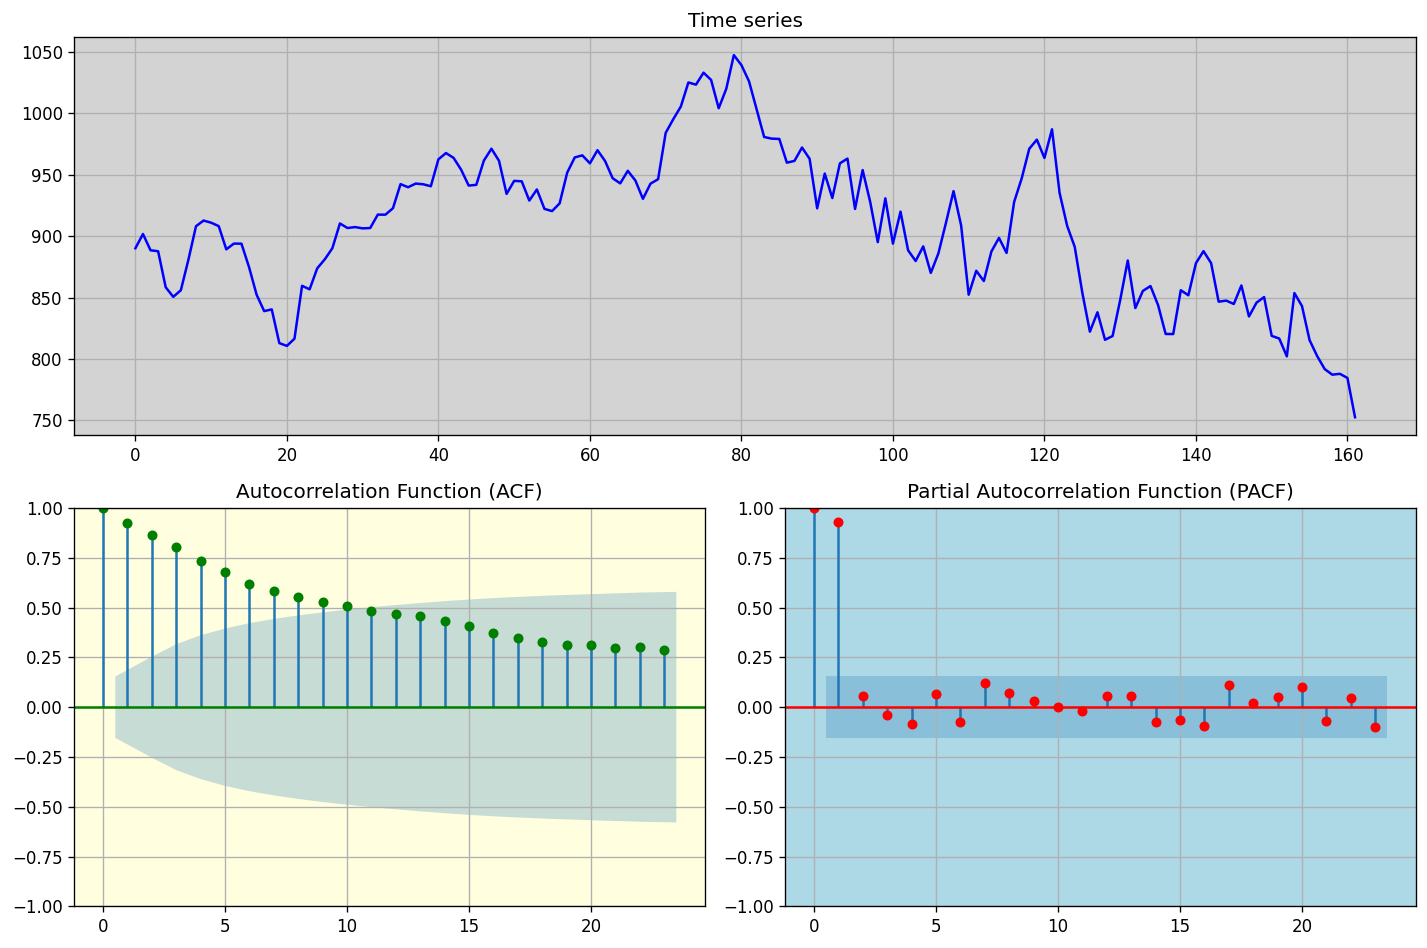

In [382]:
grafs(series)

In [383]:
Dickey_Fuller(series)

ADF Statistic: -1.314625
p-value: 0.622455
Critical Values:
	1%: -3.472

	5%: -2.880

	10%: -2.576

Временной ряд не является стационарным


**Делаем временной ряд стационарным**

In [384]:
stat_series = boxcox(series, 1) # Убираем дисперсию

In [385]:
stat_series = np.diff(stat_series, 1) # Убираем тренд

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


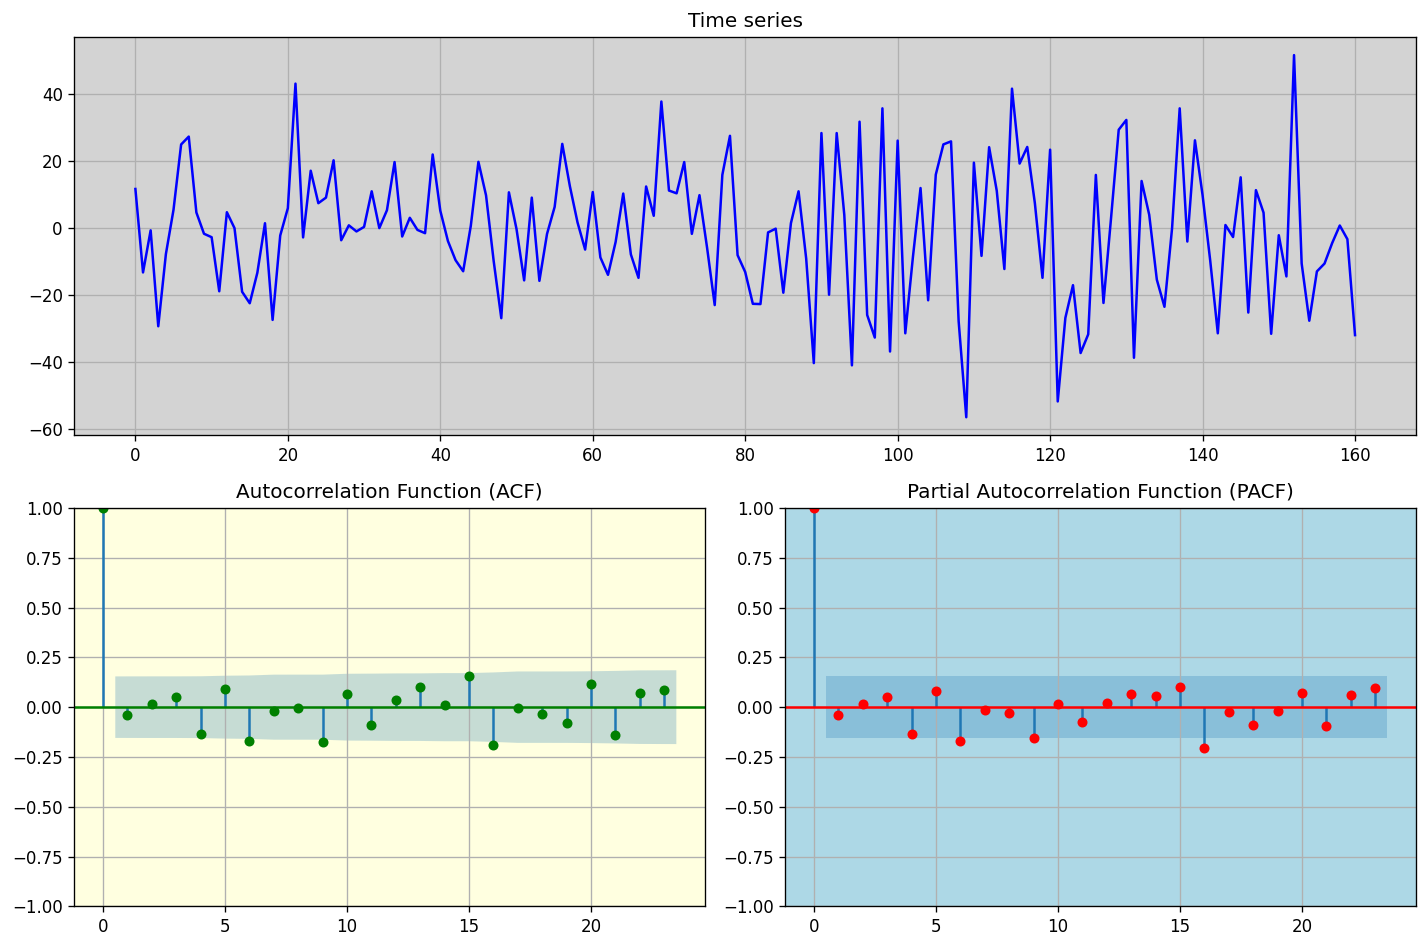

In [386]:
grafs(stat_series)

In [387]:
Dickey_Fuller(stat_series)

ADF Statistic: -13.025208
p-value: 0.000000
Critical Values:
	1%: -3.472

	5%: -2.880

	10%: -2.576

Стационарный временной ряд


In [388]:
values = stat_series.reshape(-1,1)

In [389]:
for n in range(1, 25):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -709.0736825855681
2 -708.814636446993
3 -694.6961286113667
4 -694.8484446240183
5 -691.0124549648463
6 -682.6577796436903
7 -682.221916340755
8 -683.1749491353785
9 -669.3083508846128


10 -670.1263824188676
11 -665.5043124008866
12 -646.2704797169573


13 -655.0580490103355


14 -642.5420143849286
15 -649.2788359839102


16 -644.8854146075853
17 -639.4680439667454


18 -653.2823338799191
19 -625.5165868387376


20 -620.341153174462


21 -614.1022031301518


22 -611.6561848464537


23 -619.8753209747362
24 -612.3608760722036


Метод score в GaussianHMM возвращает логарифм вероятности (log-likelihood) наблюдаемых данных, вычисленный с использованием модели скрытой марковской модели (Hidden Markov Model, HMM) с гауссовскими состояниями.Логарифм правдоподобия используется для измерения, насколько хорошо модель HMM соответствует данным. Чем ближе значение логарифма правдоподобия к нулю, тем лучше модель соответствует данным.

## Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

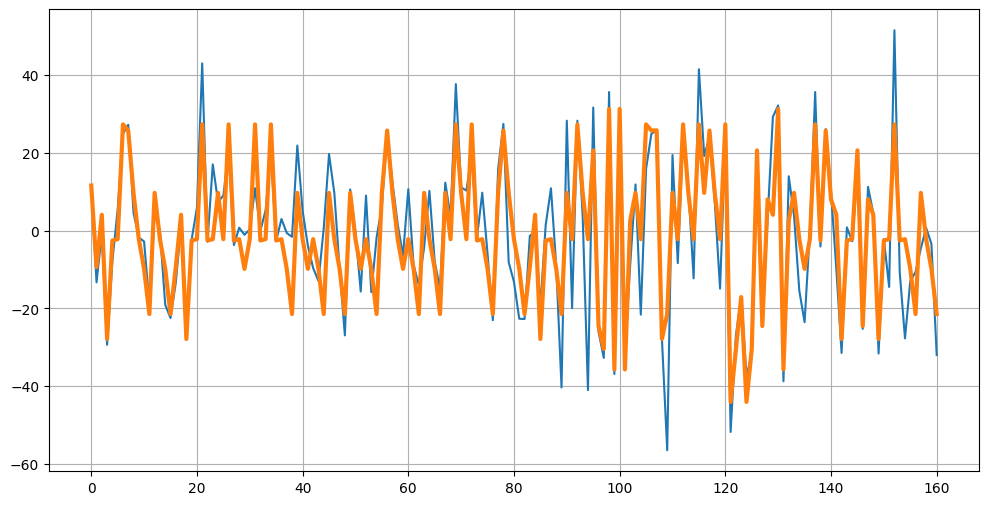

In [393]:
model = GaussianHMM(n_components=22,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)
plt.grid()
plt.show()